In [3]:
from IPython.display import display
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
#user input for stocks
stonks = []
n = int(input("Enter number of Stocks in Portfolio: ")) 
for i in range(0, n): 
    istonks = input("Enter Ticker")
    stonks.append(istonks) 
print(stonks)

#stonks = ['IBUY', 'ADBE', 'JNJ', 'JPM', 'J', 'NEE', 'AMAT', 'WDC', 'IIPR', 'GOOGL', 'BSX', 'WMT', 'LOW','SWBI', 'WU']
#stonks= ['LQD', 'GOVT', 'USIG', 'SHY' ]

Enter number of Stocks in Portfolio: 5
Enter TickerADBE
Enter TickerWU
Enter TickerSWBI
Enter TickerAMAT
Enter TickerWDC
['ADBE', 'WU', 'SWBI', 'AMAT', 'WDC']


Enter the Period of Time for Stock Data: 10y, 5y, 2y,1y, 6mo, etc2y
[*********************100%***********************]  5 of 5 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    504 non-null    datetime64[ns]
 1   Close   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


<Figure size 432x288 with 0 Axes>

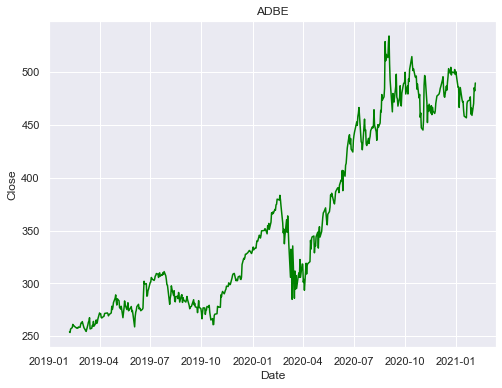

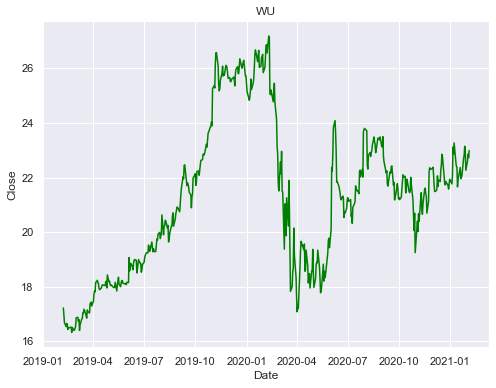

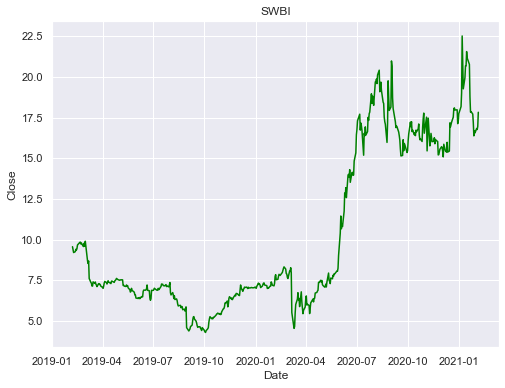

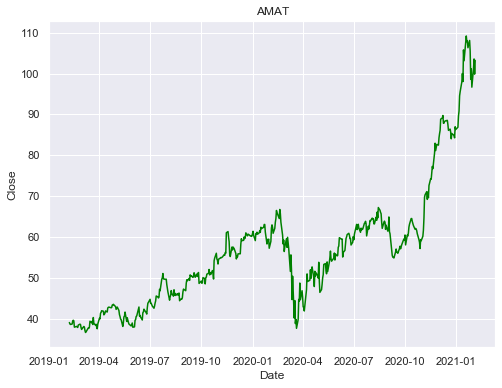

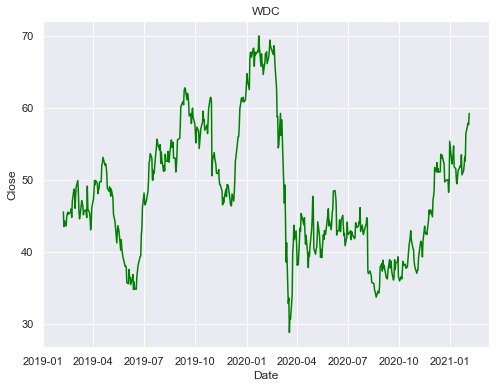

In [5]:
per = input('Enter the Period of Time for Stock Data: 10y, 5y, 2y,1y, 6mo, etc')
data = yf.download(stonks, period = per, interval = "1d", group_by= 'ticker', auto_adjust =True, prepost = False)
data[stonks[0]]
for i in range(len(stonks)):
    x= data[stonks[i]]
    x = x[~data.index.duplicated(keep='first')]
    x = x.head(-1)
    price_plt = x['Close'].reset_index()
    plt.figure(i)
    plt.figure(figsize=(8, 6))
    sns.lineplot(x= 'Date', y= 'Close', data= price_plt, color= "green").set_title(stonks[i])
price_plt.info()

In [6]:
data = data.head(-1)
print(data)

                  ADBE                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2019-02-06  255.059998  255.929993  250.710007  254.350006  2539100   
2019-02-07  251.330002  254.309998  250.279999  253.740005  2099300   
2019-02-08  251.389999  257.049988  250.639999  257.000000  2756800   
2019-02-11  258.890015  259.899994  256.190002  258.390015  3538100   
2019-02-12  260.149994  262.250000  258.670013  261.369995  2518400   
...                ...         ...         ...         ...      ...   
2021-01-29  462.170013  465.000000  455.109985  458.769989  3060400   
2021-02-01  462.279999  474.799988  459.820007  470.000000  2554800   
2021-02-02  473.649994  487.369995  472.549988  484.929993  3022000   
2021-02-03  487.089996  488.850006  479.170013  481.920013  2146900   
2021-02-04  484.220001  489.880005  481.920013  489.380005  2004000   

     

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-02-06 to 2021-02-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADBE    504 non-null    float64
 1   WU      504 non-null    float64
 2   SWBI    504 non-null    float64
 3   AMAT    504 non-null    float64
 4   WDC     504 non-null    float64
dtypes: float64(5)
memory usage: 23.6 KB


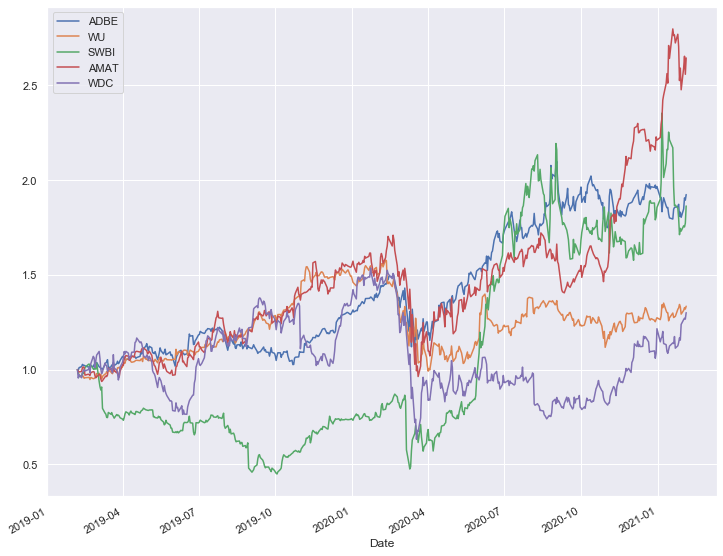

In [7]:
stonks_df = pd.DataFrame()
for i in range(len(stonks)):
    stonks_df[stonks[i]]= data[stonks[i]]['Close']
#print(stonks_df)
stonks_df.dropna(inplace=True)
Normalized_stonks = (stonks_df/stonks_df.iloc[0])
#print(Normalized_stonks)
Normalized_stonks.info()
Normalized_stonks.plot.line(figsize=(12, 10))



In [8]:
#print(stonks_df)
stonks_returns= np.log(stonks_df/stonks_df.shift(1))
stonks_returns.dropna(inplace=True)
#print(stonks_returns)
info_df= pd.DataFrame()
data_rate= 365
info_df['Annualized Returns(%)'] =stonks_returns.mean() * data_rate *100
info_df['Annualized Volatility(%)'] = stonks_returns.std() * np.sqrt(data_rate)*100
info_df['Sharpe Ratio'] = info_df['Annualized Returns(%)'] /info_df['Annualized Volatility(%)']
info_df.style.bar(color=['red','green'], align='zero')
#print(stonks_returns)

,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
ADBE,47.488314,45.571608,1.042059
WU,20.949985,40.720994,0.514476
SWBI,45.180984,80.800027,0.559170
AMAT,70.588017,59.211068,1.192142
WDC,19.082844,71.844654,0.265613


In [9]:
#Sortino Ratio


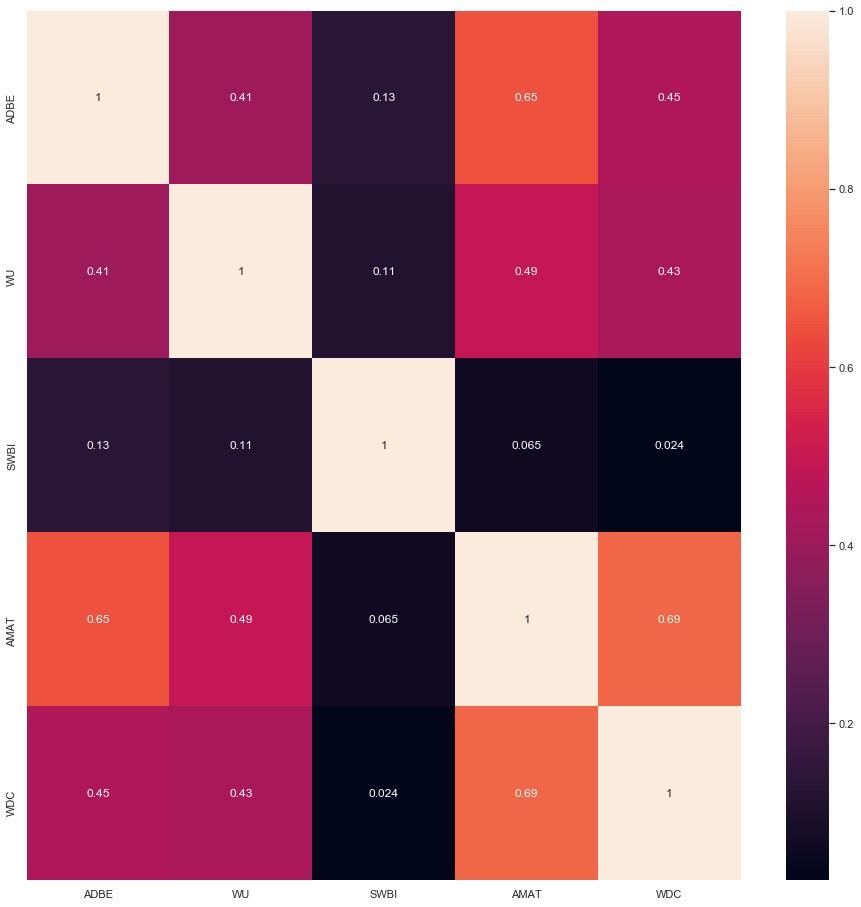

In [10]:
corr_matrix= stonks_returns.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [11]:
sim_num= 5000
monte_weights_df_list= pd.DataFrame()
port_return_sim = []
port_vol_sim =[]
all_weights = np.zeros((sim_num, len(stonks)))
sharpe_arr = np.zeros(sim_num)
for i in range(sim_num):
    monte_weights = np.random.random(len(stonks))
    monte_weights /= np.sum(monte_weights)
    all_weights[i,:] = monte_weights
    port_return_sim.append(np.sum(stonks_returns[stonks].mean()* monte_weights)* 365)
    port_vol_sim.append(np.sqrt(np.dot(monte_weights.T,np.dot(stonks_returns[stonks].cov()*365,
 monte_weights))))
    sharpe_arr[i] = port_return_sim[i]/port_vol_sim[i]
port_return_sim = np.array(port_return_sim)
port_vol_sim=np.array(port_vol_sim)
sharpe_arr=np.array(sharpe_arr)
#print(port_return_sim)
#print(port_vol_sim)
#print(all_weights)
#print(sharpe_arr)


In [12]:
print('Max Sharpe Ratio is: {}'.format(sharpe_arr.max()))
print('Max Sharpe Ratio index is: {}'.format(sharpe_arr.argmax()))
print(stonks)
print(all_weights[sharpe_arr.argmax(),:])
max_ret=port_return_sim[sharpe_arr.argmax()]
max_vol=port_vol_sim[sharpe_arr.argmax()]
print(max_ret)
print(max_vol)
print(port_return_sim.max())

Max Sharpe Ratio is: 1.2951663035670151
Max Sharpe Ratio index is: 399
['ADBE', 'WU', 'SWBI', 'AMAT', 'WDC']
[0.47428205 0.0162073  0.14166462 0.36370835 0.00413767]
0.5501535451641196
0.42477444297998085
0.5951784101833629


Text(0.5, 1.0, 'Monte Carlo Simulation Efficient Frontier')

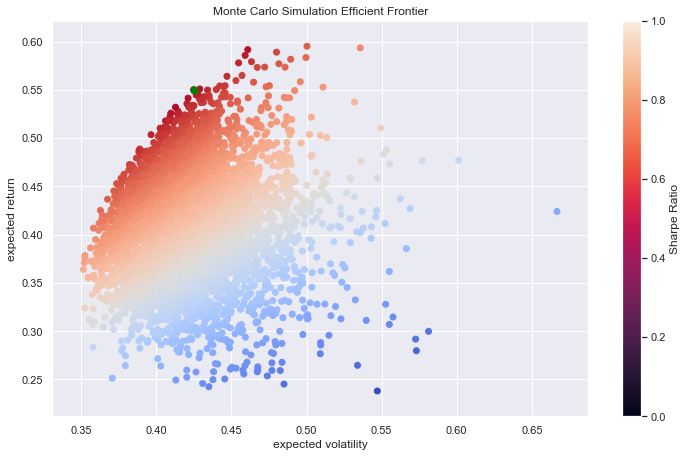

In [13]:
fig8 = plt.figure(figsize = (12,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(212)
plt.scatter(port_vol_sim, port_return_sim, c = sharpe_arr, marker = 'o',cmap='coolwarm')
plt.scatter(max_vol, max_ret, c = 'green', s= 50)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier')

In [11]:
"""from scipy.optimize import minimize
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(stonks_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(stonks_returns.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

cons= ({'type': 'eq', 'fun':check_sum})
bounds= ((0,1),(0,1),(0,1),(0,1))
init_guess = [0.25,0.25,0.25,0.25]

opt_results = minimize(neg_sharpe, init_guess, method= 'SLSQP', bounds = bounds, constraints= cons)
print(opt_results)

get_ret_vol_sr(opt_results.x)
frontier_y = np.linspace(0, 0.8,200)
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]
"""


"from scipy.optimize import minimize\ndef get_ret_vol_sr(weights):\n    weights = np.array(weights)\n    ret = np.sum(stonks_returns.mean() * weights) * 252\n    vol = np.sqrt(np.dot(weights.T, np.dot(stonks_returns.cov()*252, weights)))\n    sr = ret/vol\n    return np.array([ret, vol, sr])\n\ndef neg_sharpe(weights):\n# the number 2 is the sharpe ratio index from the get_ret_vol_sr\n    return get_ret_vol_sr(weights)[2] * -1\n\ndef check_sum(weights):\n    #return 0 if sum of the weights is 1\n    return np.sum(weights)-1\n\ncons= ({'type': 'eq', 'fun':check_sum})\nbounds= ((0,1),(0,1),(0,1),(0,1))\ninit_guess = [0.25,0.25,0.25,0.25]\n\nopt_results = minimize(neg_sharpe, init_guess, method= 'SLSQP', bounds = bounds, constraints= cons)\nprint(opt_results)\n\nget_ret_vol_sr(opt_results.x)\nfrontier_y = np.linspace(0, 0.8,200)\ndef minimize_volatility(weights):\n    return get_ret_vol_sr(weights)[1]\n"

In [12]:
"""frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])
    
plt.figure(figsize=(12,8))
plt.scatter(port_vol_sim, port_return_sim, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()"""

"frontier_x = []\n\nfor possible_return in frontier_y:\n    cons = ({'type':'eq', 'fun':check_sum},\n            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})\n    \n    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)\n    frontier_x.append(result['fun'])\n    \nplt.figure(figsize=(12,8))\nplt.scatter(port_vol_sim, port_return_sim, c=sharpe_arr, cmap='viridis')\nplt.colorbar(label='Sharpe Ratio')\nplt.xlabel('Volatility')\nplt.ylabel('Return')\nplt.plot(frontier_x,frontier_y, 'r--', linewidth=3)\nplt.savefig('cover.png')\nplt.show()"

In [14]:
# For Manually Inputing Weights
inp = 'no'
while inp == 'yes':
    inp = str(input("Would you like to continue: 'yes' or 'no'?"))
    weight=[]
    while np.sum(weight) != float(1.0):
        for i in range(len(stonks)): 
            x = float(input("Enter Weight of " + stonks[i]))
            weight.append(x) 
    print(weight)
    weight= np.array(weight)
    Expected_port_return= np.sum(stonks_returns.mean()*weight)*365
    Expected_port_Std = np.sqrt(weight.T.dot(stonks_returns.cov()*365).dot(weight))
    port_sharpe= Expected_port_return/Expected_port_Std
    print('Annualized Returns: {:.3%}'.format(Expected_port_return))
    print('Annualized Volatility: {:.3%}'.format(Expected_port_Std))
    print('Sharpe Ratio: {:.4}'.format(port_sharpe))
    if inp == 'no':
        break

In [15]:
#weight=[0.14807922, 0.16466128, 0.07525923, 0.00480915, 0.03407212, 0.0134774,
 #0.07040439, 0.00621632, 0.03569034, 0.14024049, 0.01212091, 0.00636116, 0.16319165, 0.09052107, 0.02298392, 0.01191133]
weight= [0.11653013, 0.10643223, 0.08422631, 0.00133211, 0.01033815, 0.15128304, 0.06479316, 0.00739478, 0.13266492, 0.05982642, 0.04869271, 0.07241916, 0.02592086, 0.03016695, 0.08797907]
weight= np.array(weight)
print(weight)
Expected_port_return= np.sum(stonks_returns.mean()*weight)*365
Expected_port_Std = np.sqrt(weight.T.dot(stonks_returns.cov()*365).dot(weight))
port_sharpe= Expected_port_return/Expected_port_Std
print('Annualized Returns: {:.3%}'.format(Expected_port_return))
print('Annualized Volatility: {:.3%}'.format(Expected_port_Std))
print('Sharpe Ratio: {:.4}'.format(port_sharpe))


[0.11653013 0.10643223 0.08422631 0.00133211 0.01033815 0.15128304
 0.06479316 0.00739478 0.13266492 0.05982642 0.04869271 0.07241916
 0.02592086 0.03016695 0.08797907]


ValueError: operands could not be broadcast together with shapes (5,) (15,) 